# Introduction

In this notebook we use Google's Tensorflow library to predict the dimensions of diamonds depending on the price.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from scipy import stats

## The data

### Getting the data

Reading the dataset into a Pandas Dataframe Object

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Removing unnecessary columns

We will use the price(x) to predict the dimensions(x,y,z), so we can ignore the other features:

In [4]:
data = data[['x','y','z', 'price']]

In [5]:
data.head()

,x,y,z,price
0,3.95,3.98,2.43,326
1,3.89,3.84,2.31,326
2,4.05,4.07,2.31,327
3,4.20,4.23,2.63,334
4,4.34,4.35,2.75,335


### Cleaning the data
The dataset has no null values as seen:

In [6]:
data.isna().sum()

x        0
y        0
z        0
price    0
dtype: int64

Remove outliers that have z score higher than 3 or lower than -3 

In [7]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [8]:
data_count = data['x'].count()
data_count

52689

### Functions

plot function to plot the data in relation to the regression

In [9]:
def plot(x, y, xname, yname,data):
    plt.figure(figsize=(15, 10))
    plt.scatter(data[xname], data[yname], label='Data', color = '#da8266')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.legend()

a function that plots the error distribution

In [10]:
def plot_error(ls, yname):
    error = ls - data[yname]
    plt.figure(figsize=(15, 10))
    plt.hist(error, bins=1000)
    plt.xlabel('Prediction Error of the ', yname)
    xlim = [-7500, 7500]
    ylim = [0, 700]
    plt.xlim(xlim)
    plt.ylim(ylim)
    _ =plt.ylabel('Count')

##### x is the input
##### y is the actual output
##### y_hat is the predicted output
##### b0 is the slope of the line

function that returns b0 and b1 in a list

In [11]:
def bees(r,xname,yname,data):
    b = []
    x_mean = data[xname].mean()
    y_mean = data[yname].mean()
    b.append(r * (data[yname].std() / data[xname].std()))
    b.append(y_mean - (b[0] * x_mean))
    return b

y_hat = b0 + b1* x. from this we will creat a function that predicts y_hat given x , b0 and b1

In [12]:
def predict(x, b):
    return b[0] * x + b[1]

function that returns a list of x values

In [13]:
def xlist(xname,data):
    xmax = data[xname].max()
    x = tf.linspace(0.0, xmax, data_count)
    return x

function that calculates the mean error

In [14]:
def mean_error(xname,yname,b,data):
    y_hat = (b[0] * data[xname]) + b[1]
    error = y_hat - data[yname]
    error = np.abs(error)
    return error.mean()

## Linear regression x (length)

### Correlation Coefficient

we Begin by getting the correlation coefficient (r) between the price and the x (length):


In [15]:
r = data['x'].corr(data['price'])
r

0.8906391300082294

In [16]:
b = bees(r,'price','x',data)
b

[0.0002741215318290222, 4.683306837056836]

#### comparing our prediction to the actual price

In [17]:
predict(data['price'][210],b) #our prediction

5.445364695541518

In [18]:
data['x'][210] # actual length

5.61

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:

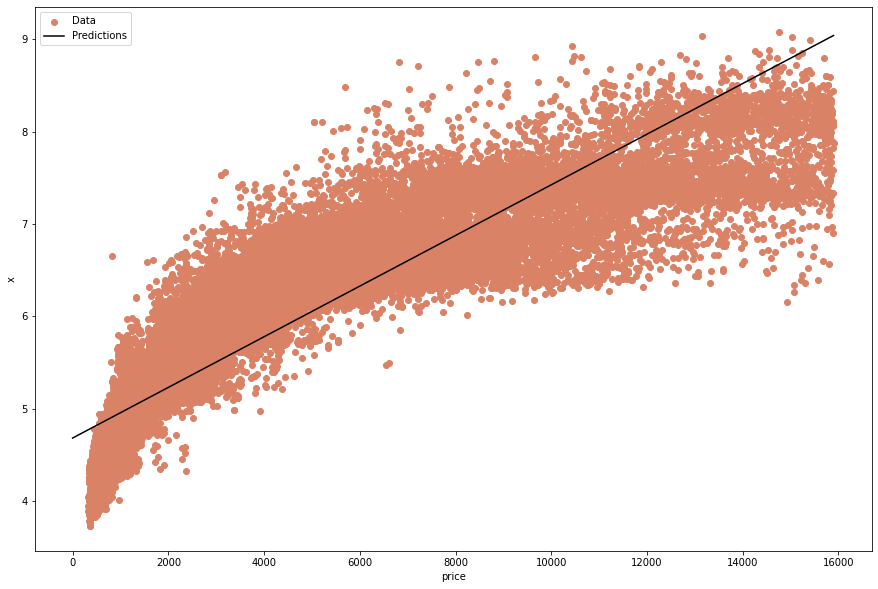

In [19]:
prices = xlist('price',data)
xs = (b[0] * prices) + b[1]
plot(prices , xs, 'price', 'x', data)

In [20]:
mean_error('price','x',b,data)

0.4004771743559794

mean absolute error is 0.4005 mms which is really great

## Linear regression y (width)

### Correlation Coefficient

we Begin by getting the correlation coefficient (r) between the price and the y (width):


In [ ]:
r = data['y'].corr(data['price'])
r

In [ ]:
b = bees(r,'price','y',data)
b

[0.00027256986042026614, 4.691024523096478]

#### comparing our prediction to the actual price

In [ ]:
predict(data['price'][210],b) #our prediction

5.448768735064817

In [ ]:
data['y'][210] # actual price

5.65

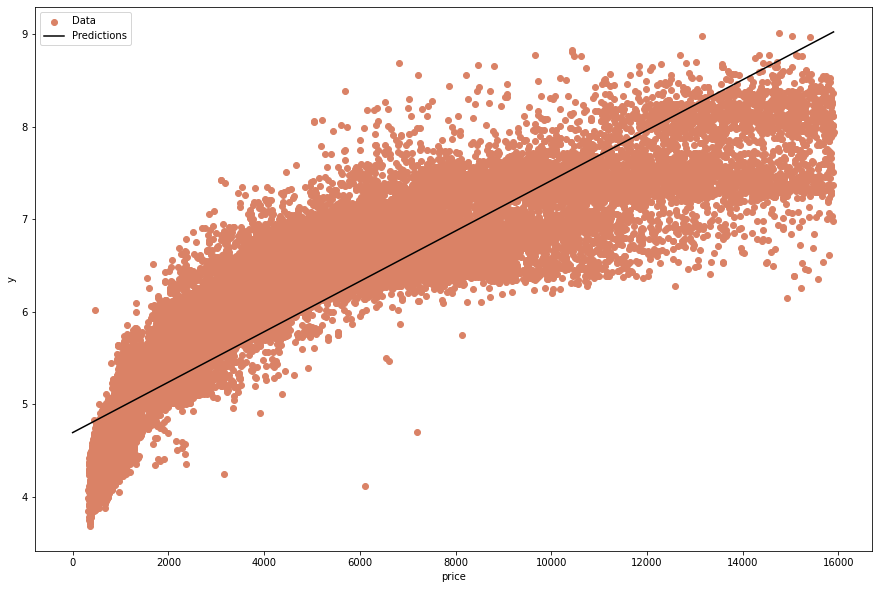

In [ ]:
prices = xlist('price',data)
ys = (b[0] * prices) + b[1]
plot(prices , ys, 'price', 'y', data)

In [ ]:
mean_error('price','y',b,data)

0.3963977618466959

mean absolute error is 0.3964 mms which is impressive

In [ ]:
plot_error(ys, 'y', data)

## Linear regression z (depth)

### Correlation Coefficient

we Begin by getting the correlation coefficient (r) between the price and the z (depth):


In [ ]:
b = bees(r,'price','x',data)
b

[0.0002746165256360717, 4.681513564597819]

In [ ]:
r = data['z'].corr(data['price'])
r

0.8862802277615484

In [ ]:
b = bees(r,'price','z',data)
b

[0.00016870983446432182, 2.8946369964153784]

#### comparing our prediction to the actual price

In [ ]:
predict(data['price'][210],b) #our prediction

3.363650336226193

In [ ]:
data['z'][210] # actual price

3.58

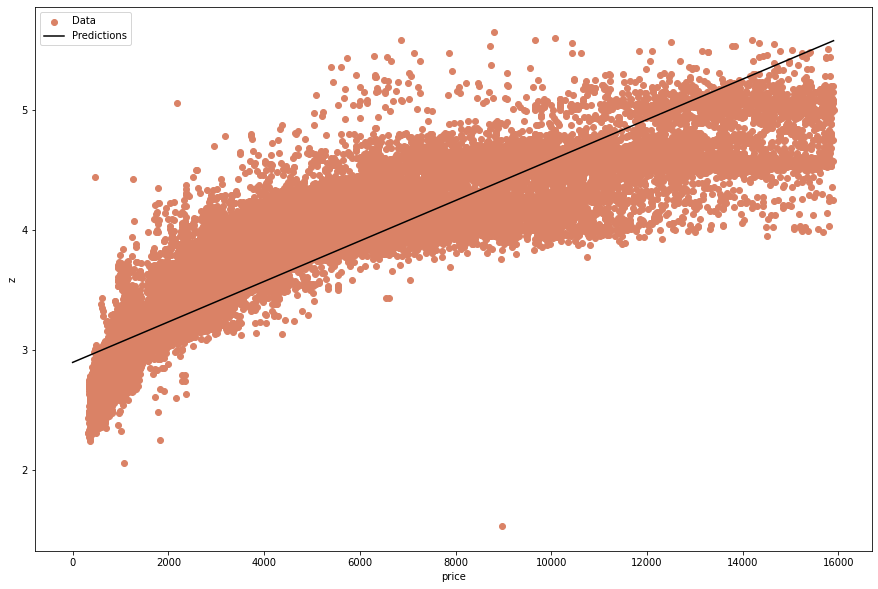

In [ ]:
prices = xlist('price',data)
zs = (b[0] * prices) + b[1]
plot(prices , zs, 'price', 'z', data)

In [ ]:
mean_error('price','z',b,data)

0.25096472072612175

mean absolute error is 0.251 mm which is amazing

In [ ]:
plot_error(zs, 'z', data)

A function that calculates the 3 dimensions of the diamond (x,y,z)

In [ ]:
def dimensions(price, data):
    d = []
    r = data['x'].corr(data['price'])
    b = bees(r,'price','x',data)
    d.append(predict(price,b))
    r = data['y'].corr(data['price'])
    b = bees(r,'price','y',data)
    d.append(predict(price,b))
    r = data['z'].corr(data['price'])
    b = bees(r,'price','z',data)
    d.append(predict(price,b))
    return d

Comparing our prediction to real values

In [ ]:
dimensions(data['price'][100], data)

[5.439882264904938, 5.443317337856413, 3.3602761395369067]

In [ ]:
l = []
l.append(data['x'][100])
l.append(data['y'][100])
l.append(data['z'][100])
l

[5.8, 5.75, 3.65]

real values don't differ that much which means our model is good

## Conclusion
We used correlation coefficient to perform linear regression to predict the diamond's dimensions (x,y,z) using the diamond's price. We then measured the regression performance using the absolute mean error for the x,y,z predictions which equated to (0.4005 mm, 0.3964 mm and 0.251 mm) respectively.